In [ ]:
# Import pandas 
import pandas as pd
import numpy as np

# Read in white wine data 
white = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep=';')

# Read in red wine data 
red = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=';')

In [ ]:
# Print info on white wine
print(white.info())

# Print info on red wine
print(red.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column   

In [ ]:
white.describe()

fixed acidity  volatile acidity  ...      alcohol      quality
count    4898.000000       4898.000000  ...  4898.000000  4898.000000
mean        6.854788          0.278241  ...    10.514267     5.877909
std         0.843868          0.100795  ...     1.230621     0.885639
min         3.800000          0.080000  ...     8.000000     3.000000
25%         6.300000          0.210000  ...     9.500000     5.000000
50%         6.800000          0.260000  ...    10.400000     6.000000
75%         7.300000          0.320000  ...    11.400000     6.000000
max        14.200000          1.100000  ...    14.200000     9.000000

[8 rows x 12 columns]

In [ ]:
red.describe()

fixed acidity  volatile acidity  ...      alcohol      quality
count    1599.000000       1599.000000  ...  1599.000000  1599.000000
mean        8.319637          0.527821  ...    10.422983     5.636023
std         1.741096          0.179060  ...     1.065668     0.807569
min         4.600000          0.120000  ...     8.400000     3.000000
25%         7.100000          0.390000  ...     9.500000     5.000000
50%         7.900000          0.520000  ...    10.200000     6.000000
75%         9.200000          0.640000  ...    11.100000     6.000000
max        15.900000          1.580000  ...    14.900000     8.000000

[8 rows x 12 columns]

In [ ]:
pd.isnull(red).count()

fixed acidity           1599
volatile acidity        1599
citric acid             1599
residual sugar          1599
chlorides               1599
free sulfur dioxide     1599
total sulfur dioxide    1599
density                 1599
pH                      1599
sulphates               1599
alcohol                 1599
quality                 1599
dtype: int64

In [ ]:
pd.isnull(white).count()

fixed acidity           4898
volatile acidity        4898
citric acid             4898
residual sugar          4898
chlorides               4898
free sulfur dioxide     4898
total sulfur dioxide    4898
density                 4898
pH                      4898
sulphates               4898
alcohol                 4898
quality                 4898
dtype: int64

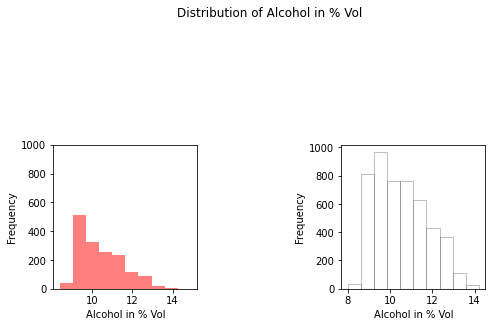

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2)

ax[0].hist(red.alcohol, 10, facecolor='red', alpha=0.5, label="Red wine")
ax[1].hist(white.alcohol, 10, facecolor='white', ec="black", lw=0.5, alpha=0.5, label="White wine")

fig.subplots_adjust(left=0, right=1, bottom=0, top=0.5, hspace=0.05, wspace=1)
ax[0].set_ylim([0, 1000])
ax[0].set_xlabel("Alcohol in % Vol")
ax[0].set_ylabel("Frequency")
ax[1].set_xlabel("Alcohol in % Vol")
ax[1].set_ylabel("Frequency")
#ax[0].legend(loc='best')
#ax[1].legend(loc='best')
fig.suptitle("Distribution of Alcohol in % Vol")

plt.show()

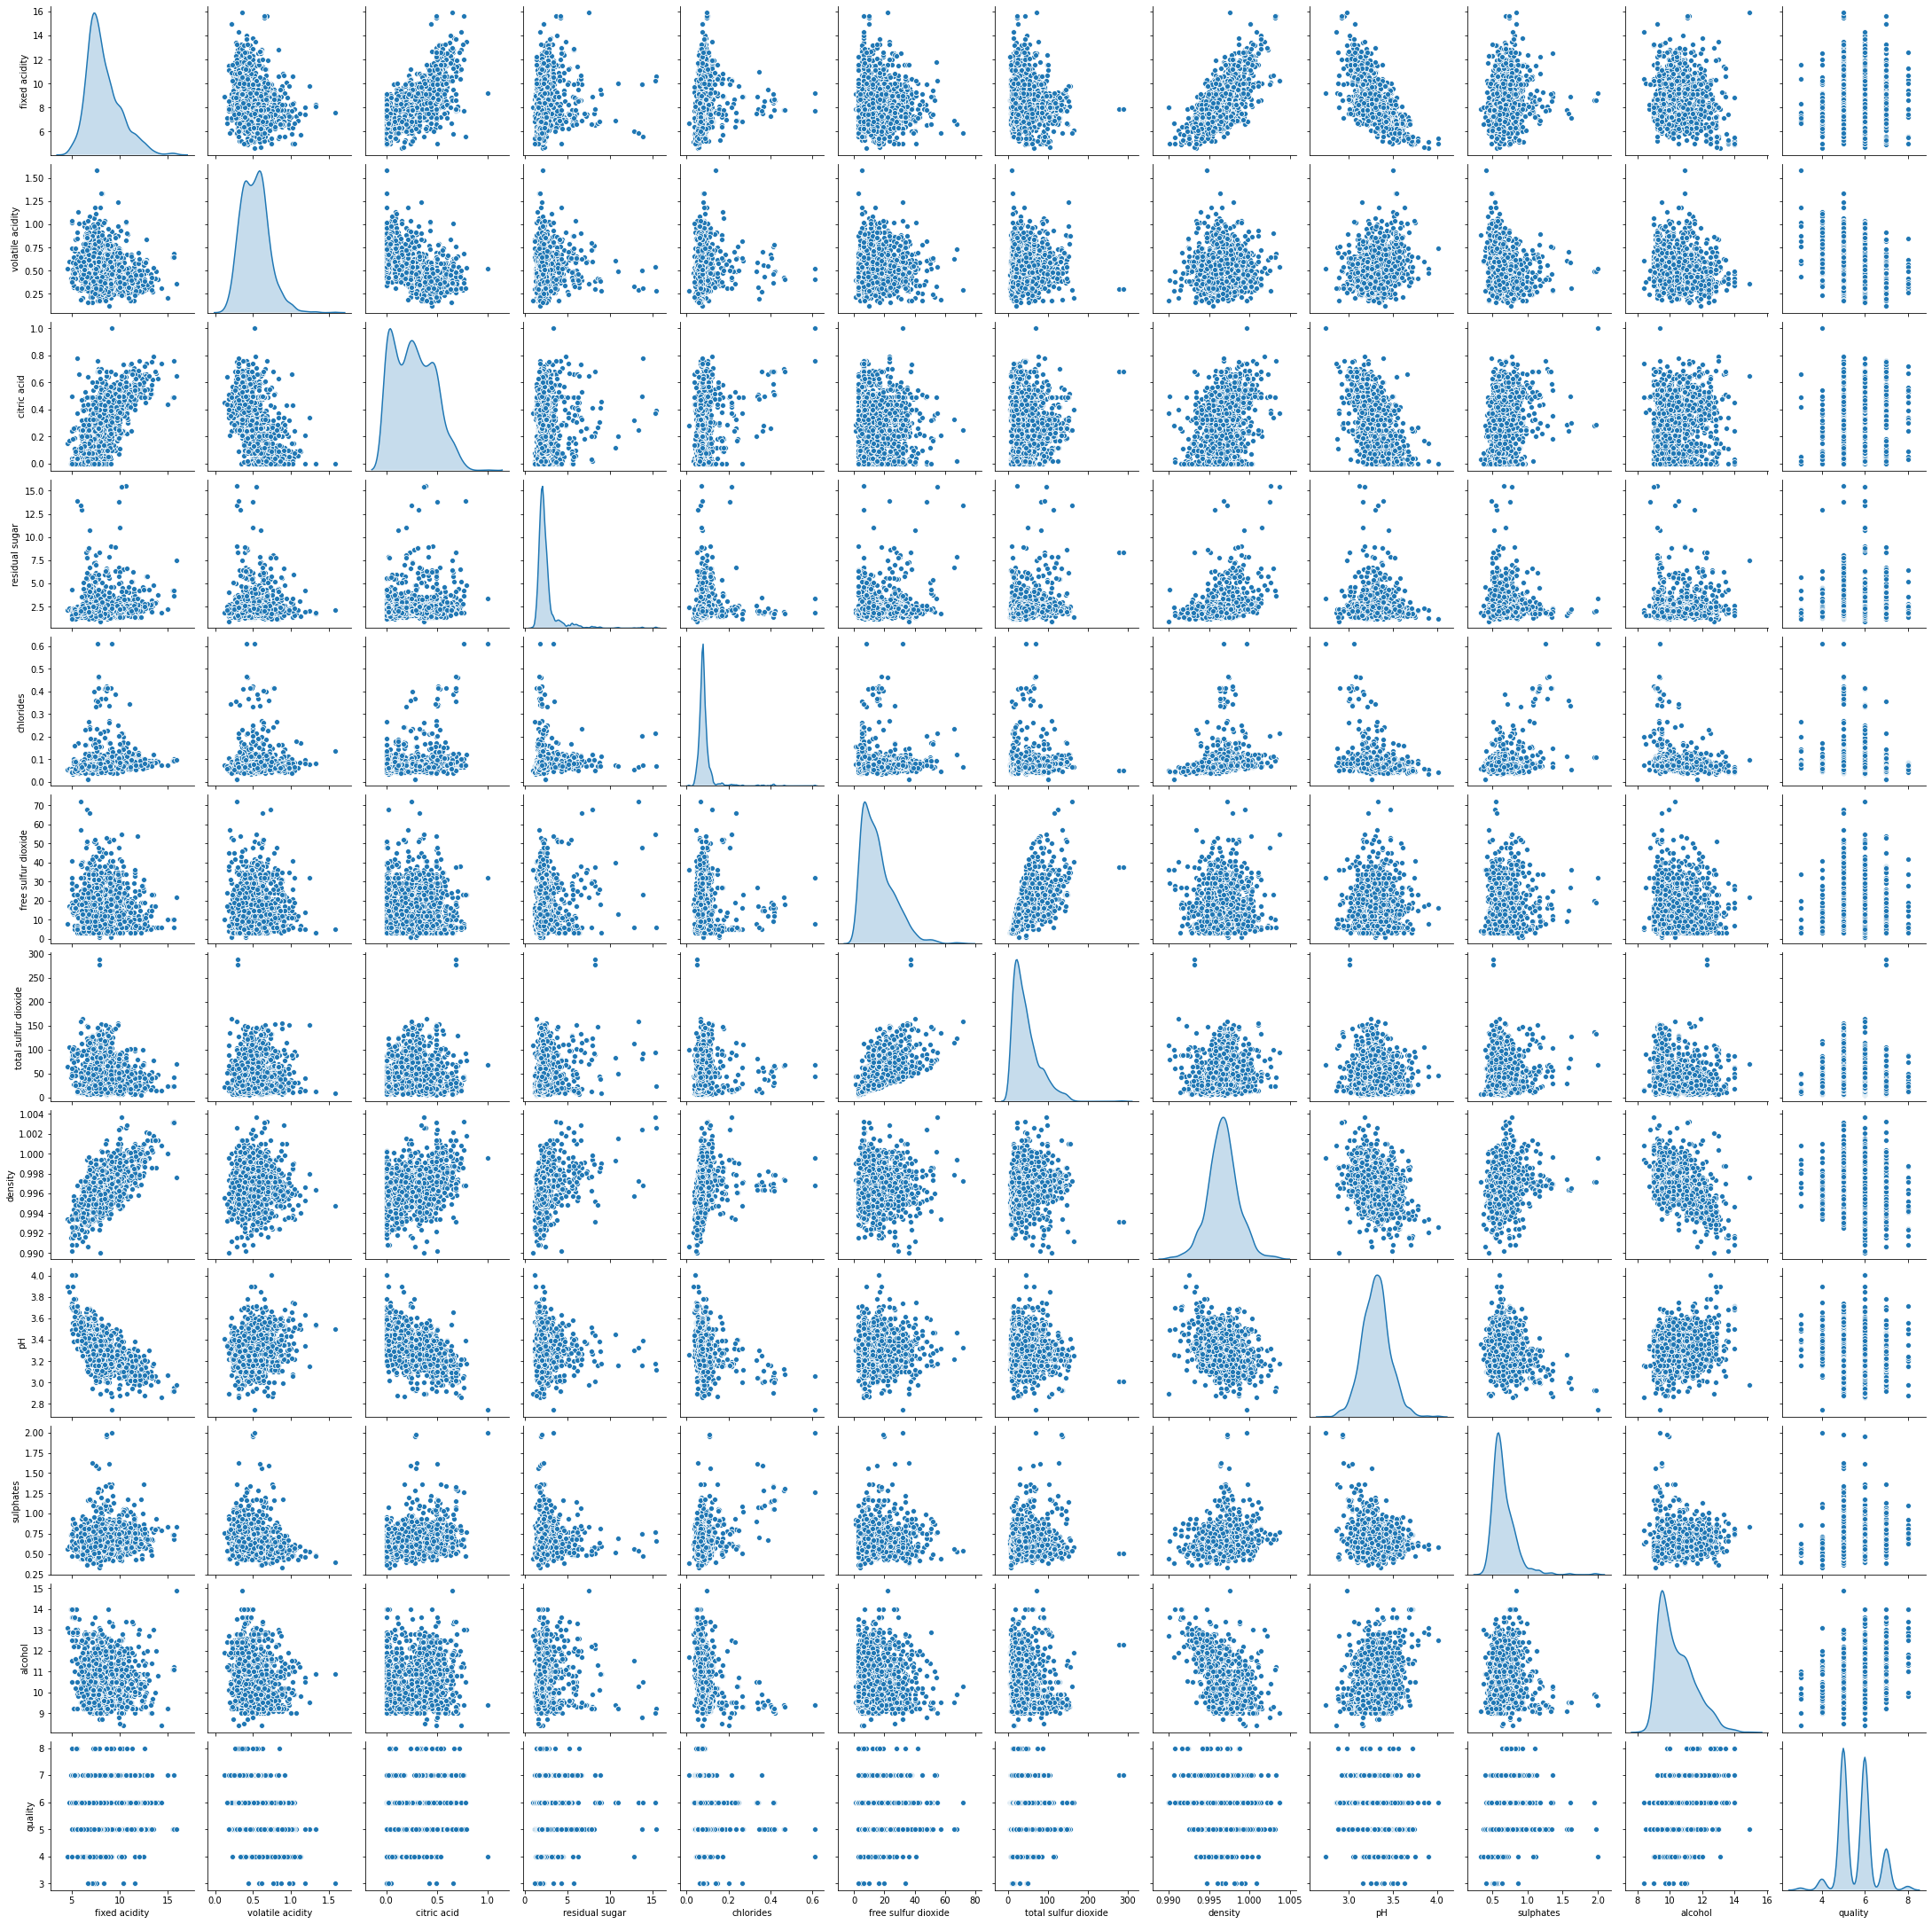

In [ ]:
import seaborn as sns

sns.pairplot(data=red, diag_kind = 'kde')



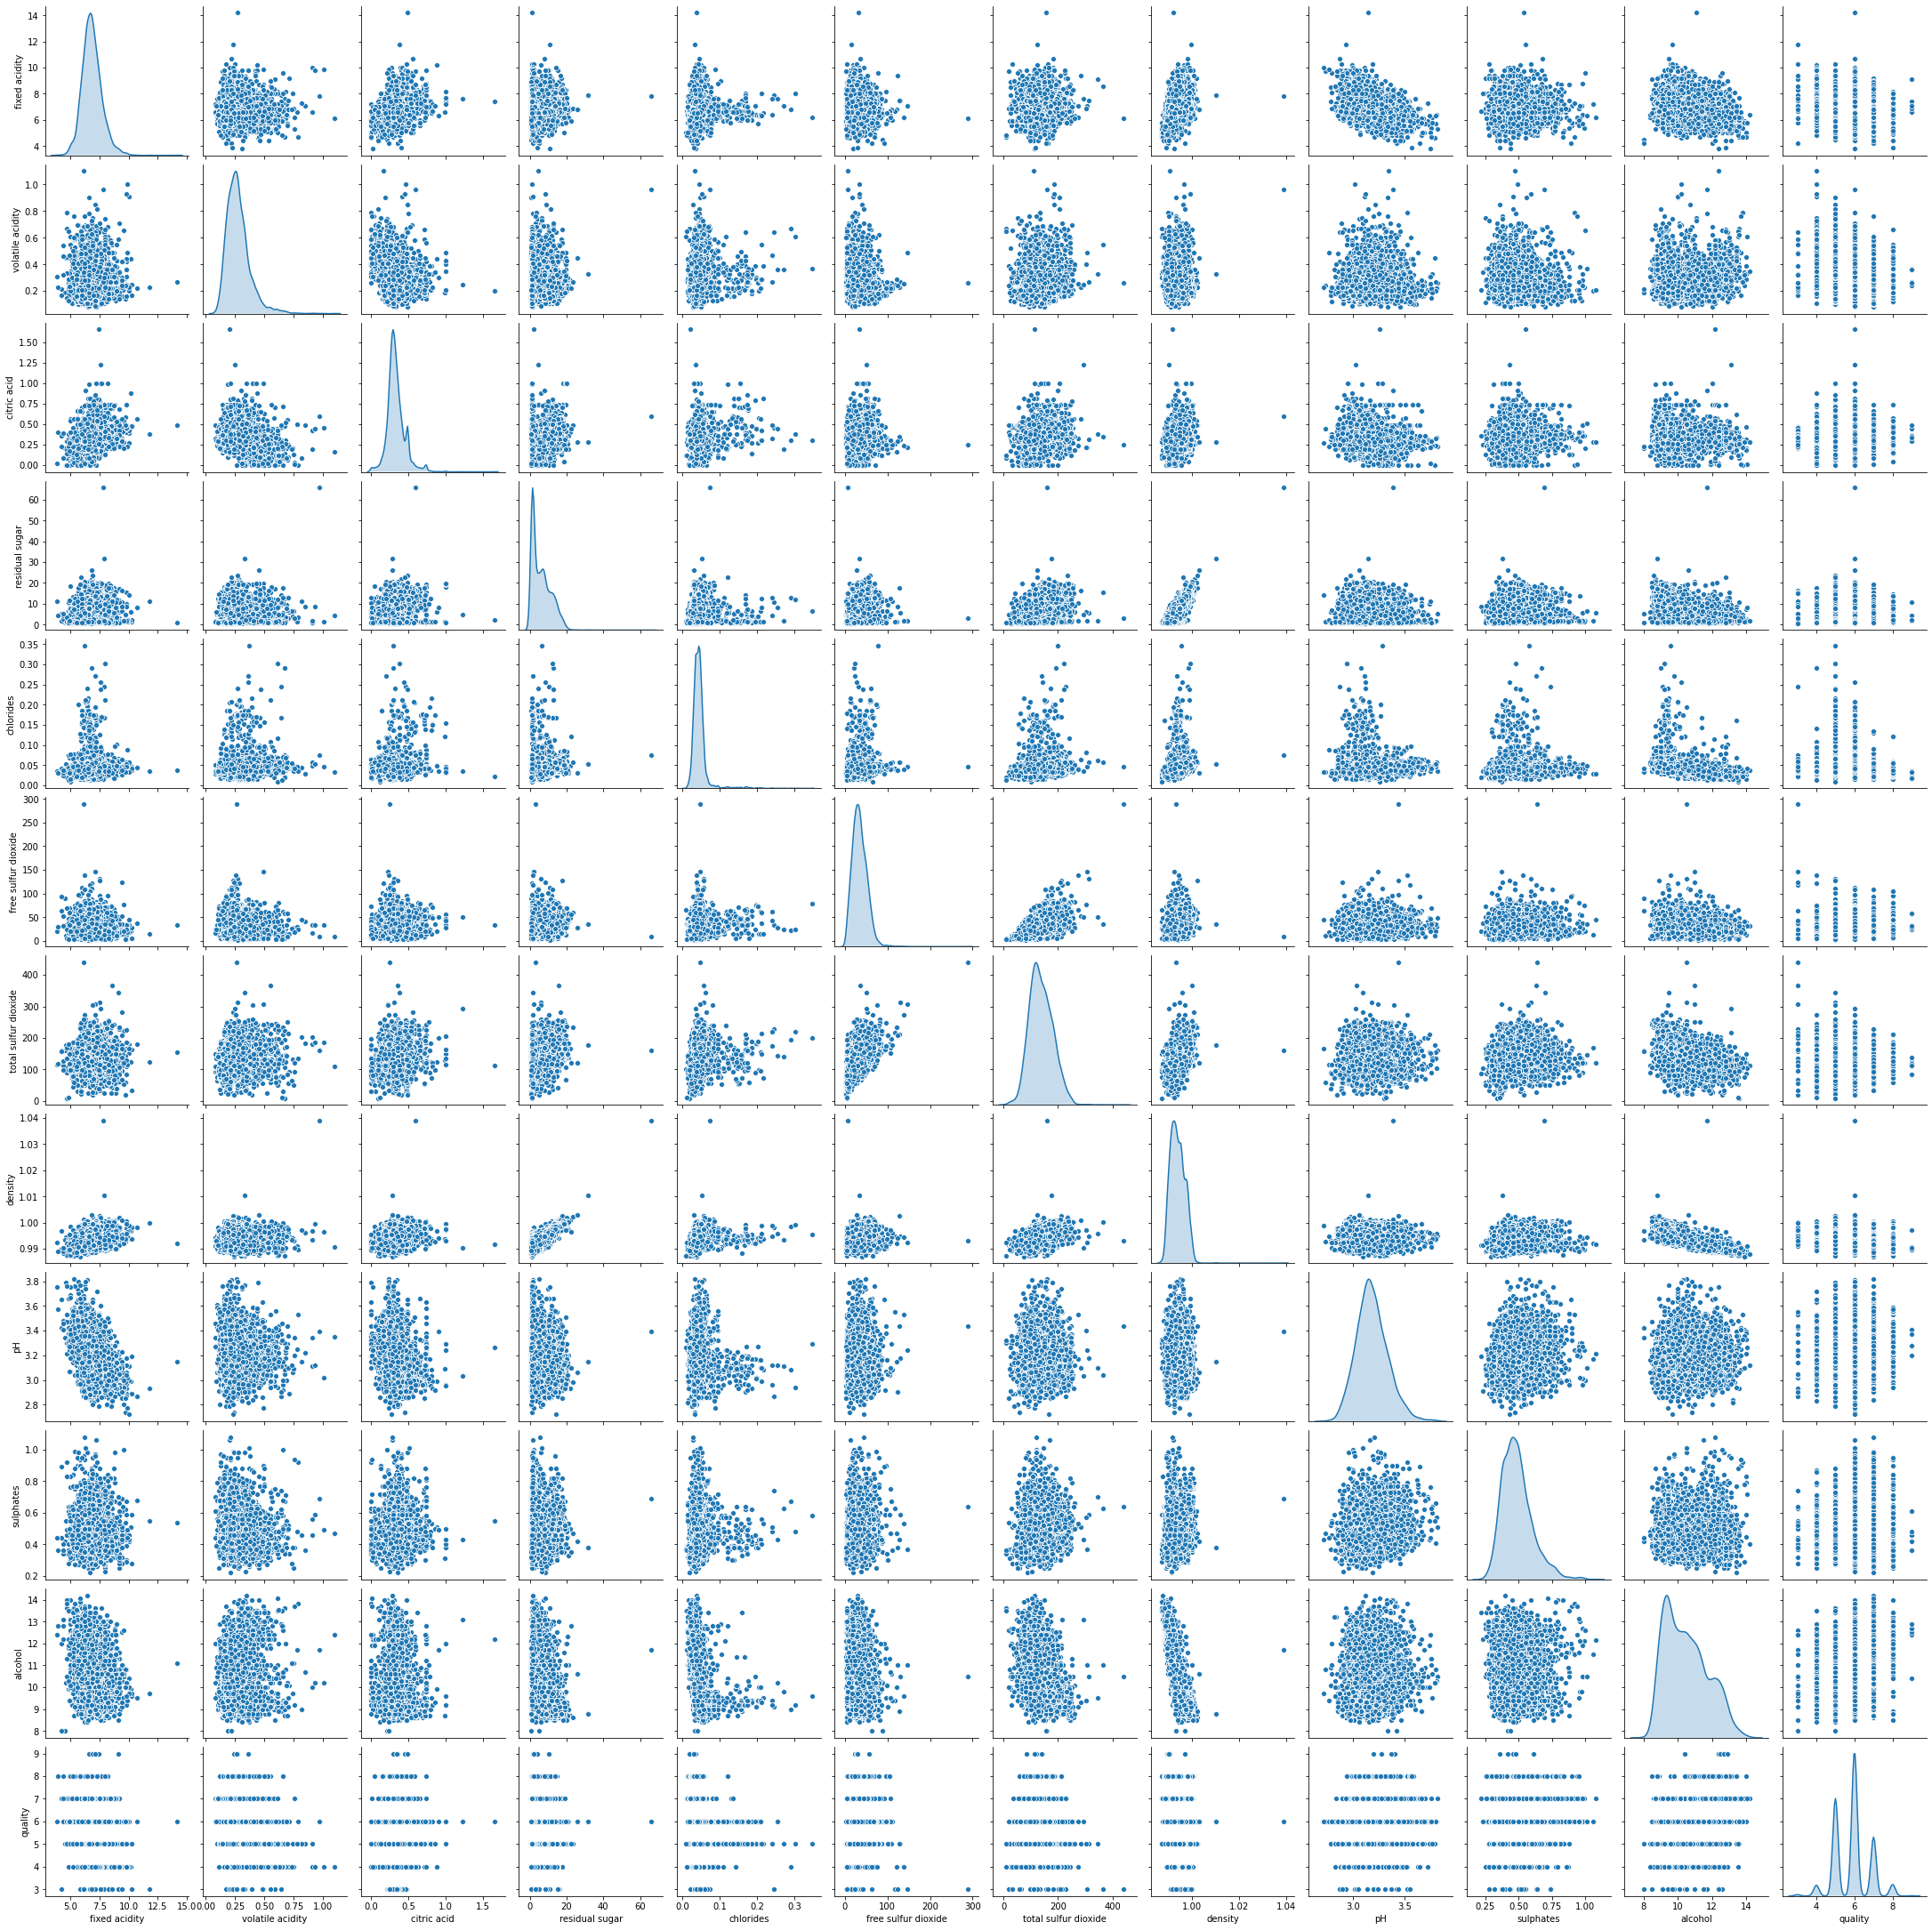

In [ ]:
sns.pairplot(data=white, diag_kind = 'kde')

In [ ]:
# Add `type` column to `red` with value 1
red['type'] = 1

# Add `type` column to `white` with value 0
white['type'] = 0

# Append `white` to `red`
wines = red.append(white, ignore_index=True)
wines.tail()

fixed acidity  volatile acidity  citric acid  ...  alcohol  quality  type
6492            6.2              0.21         0.29  ...     11.2        6     0
6493            6.6              0.32         0.36  ...      9.6        5     0
6494            6.5              0.24         0.19  ...      9.4        6     0
6495            5.5              0.29         0.30  ...     12.8        7     0
6496            6.0              0.21         0.38  ...     11.8        6     0

[5 rows x 13 columns]

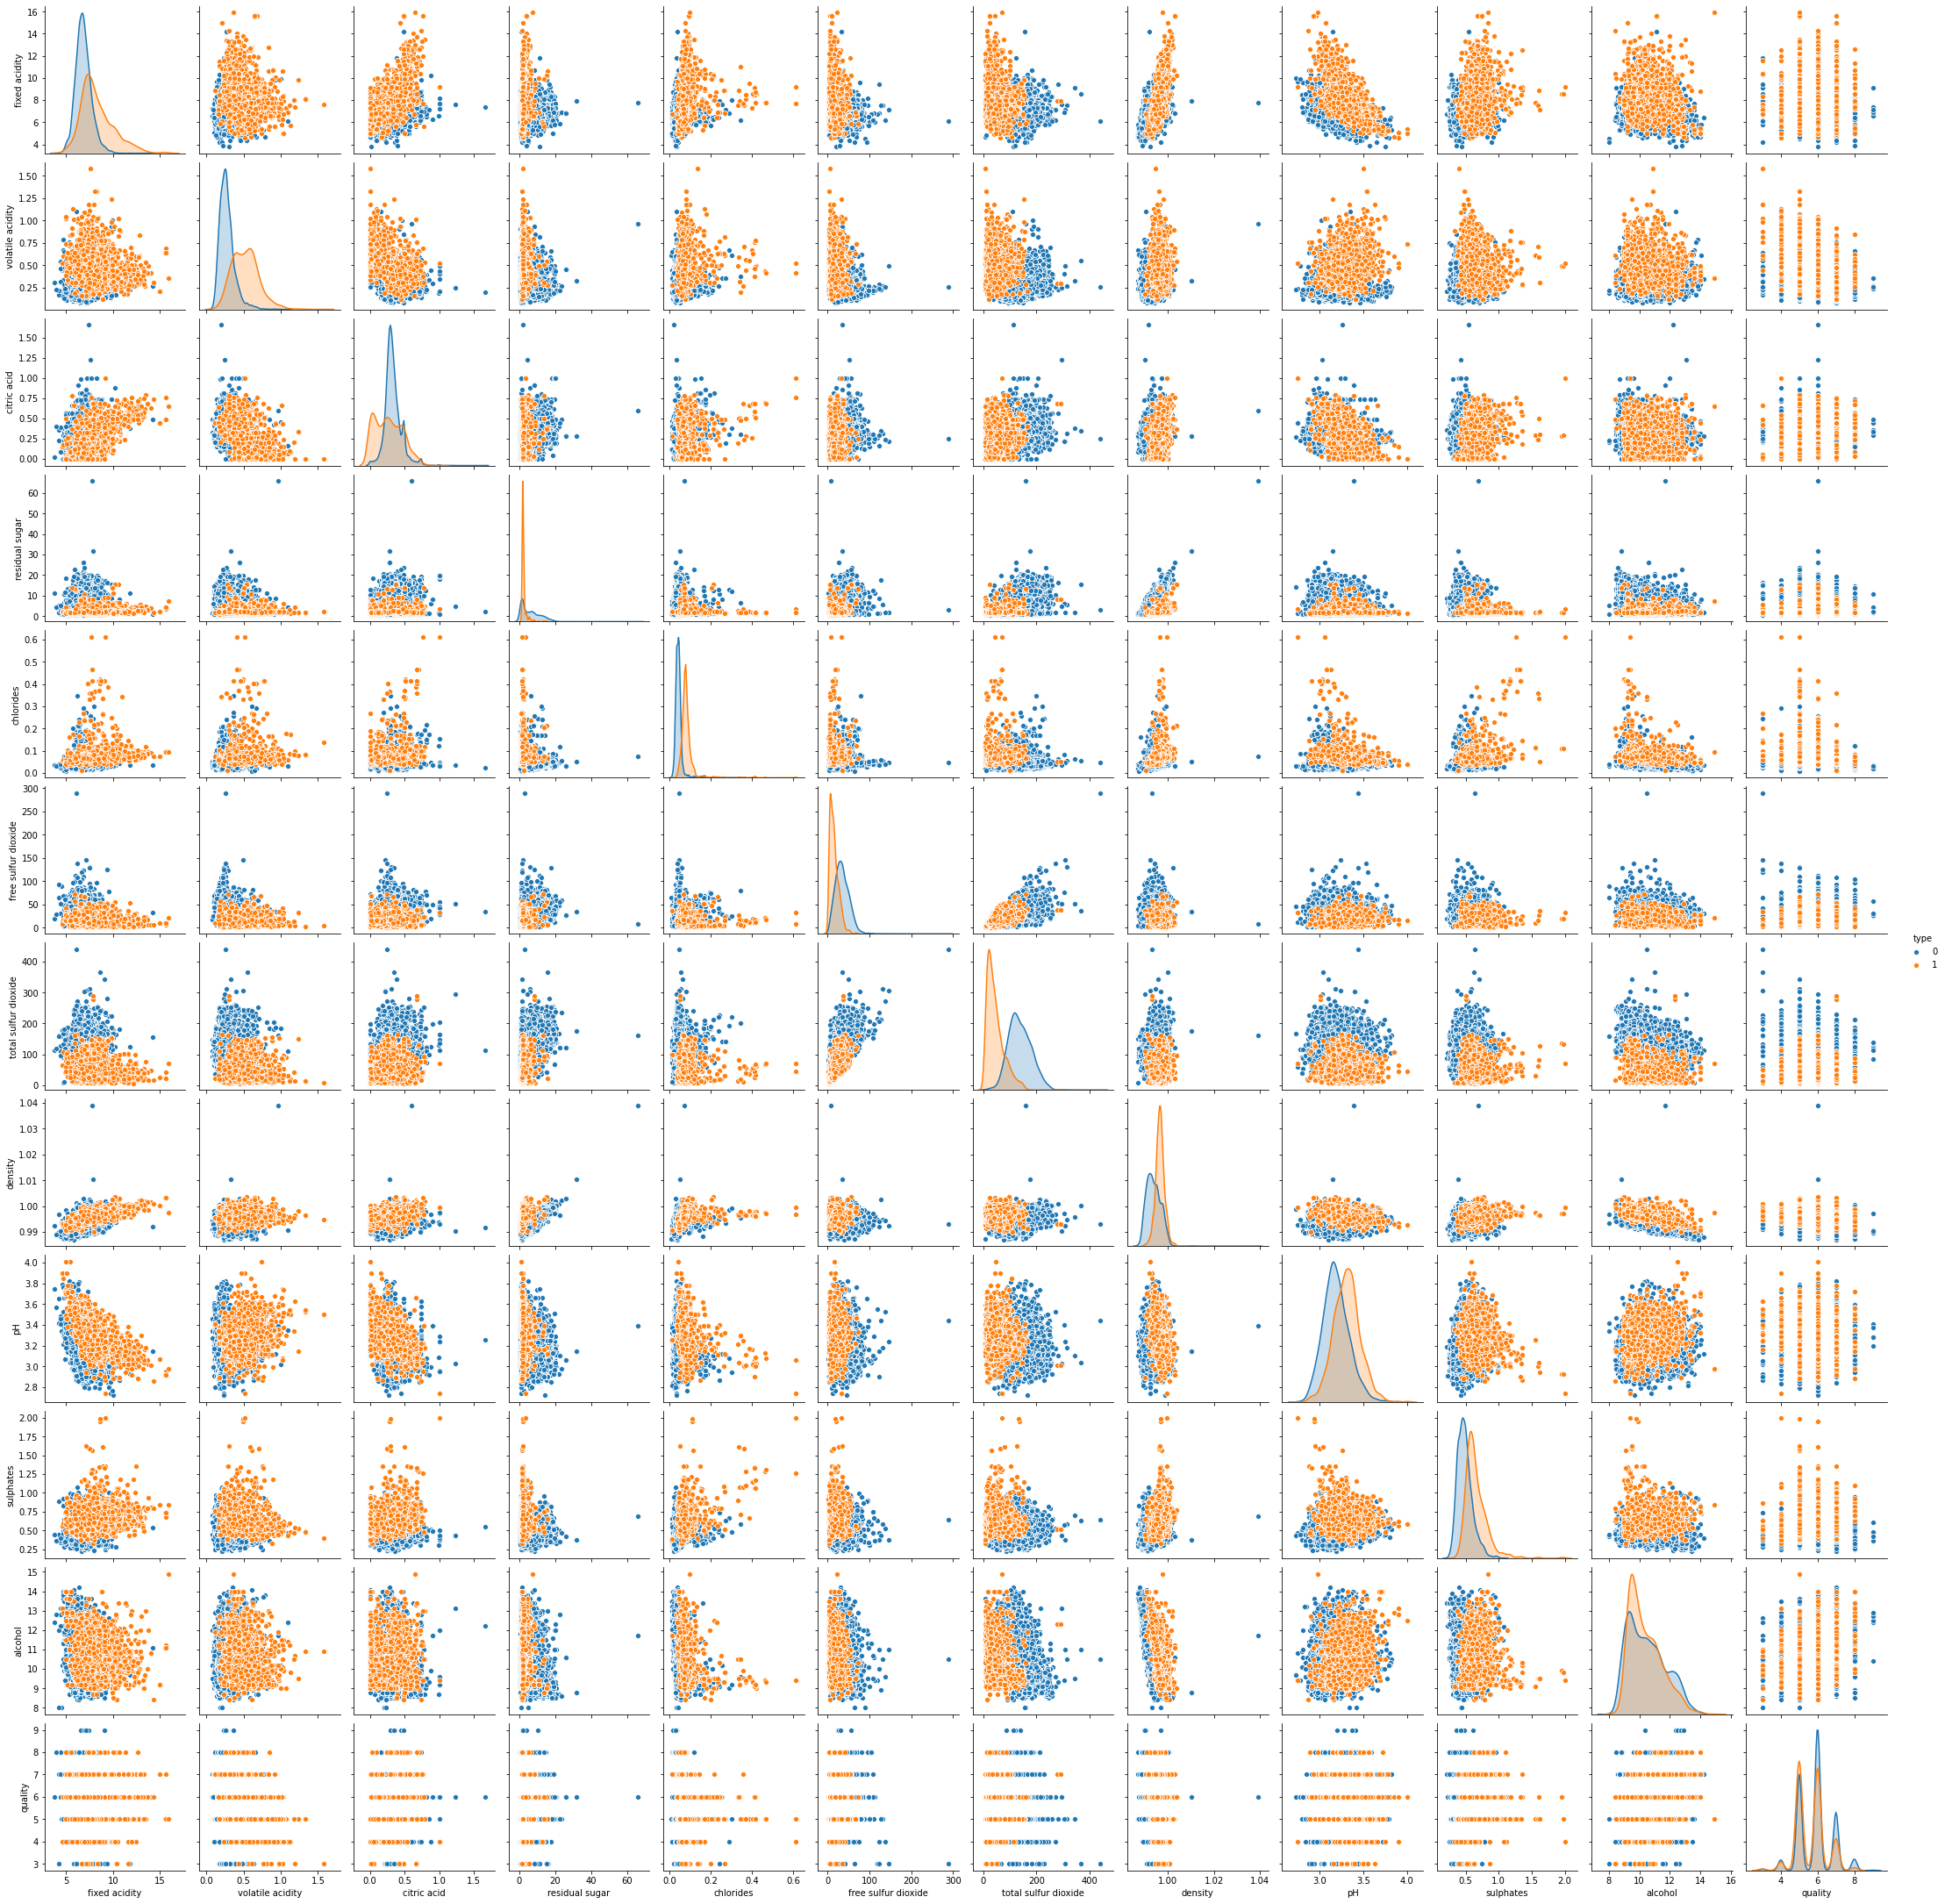

In [ ]:
import seaborn as sns
sns.pairplot(wines,diag_kind='kde',hue='type')

In [ ]:
# Import `train_test_split` from `sklearn.model_selection`
from sklearn.model_selection import train_test_split

# Specify the data 
X=wines.iloc[:,0:11]

# Specify the target labels and flatten the array
y= np.ravel(wines.type)
#y= wines.type

# Split the data up in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
y_test[0:10]

array([0, 1, 0, 0, 0, 1, 0, 0, 1, 0])

In [ ]:
# Import `StandardScaler` from `sklearn.preprocessing`
from sklearn.preprocessing import StandardScaler

# Define the scaler 
scaler = StandardScaler().fit(X_train)

# Scale the train set
X_train = scaler.transform(X_train)

# Scale the test set
X_test = scaler.transform(X_test)

# Deep Neural Network

In [ ]:
# Using Tensorflow Keras instead of the original Keras



from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# define the model architecture

# Initialize the constructor
model = Sequential()

# Add an input layer 
model.add(Dense(12, activation='sigmoid', input_shape=(11,)))

# Add one hidden layer 
model.add(Dense(8, activation='sigmoid'))

# Add an output layer 
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
                   
history = model.fit(X_train, y_train,epochs=20, batch_size=1, verbose=1)

Epoch 1/20
4547/4547 [==============================] - 5s 1ms/step - loss: 0.1805 - accuracy: 0.9391
Epoch 2/20
4547/4547 [==============================] - 5s 1ms/step - loss: 0.0303 - accuracy: 0.9941
Epoch 3/20
4547/4547 [==============================] - 5s 1ms/step - loss: 0.0237 - accuracy: 0.9947
Epoch 4/20
4547/4547 [==============================] - 5s 1ms/step - loss: 0.0219 - accuracy: 0.9952
Epoch 5/20
4547/4547 [==============================] - 5s 1ms/step - loss: 0.0210 - accuracy: 0.9954
Epoch 6/20
4547/4547 [==============================] - 5s 1ms/step - loss: 0.0205 - accuracy: 0.9958
Epoch 7/20
4547/4547 [==============================] - 5s 1ms/step - loss: 0.0197 - accuracy: 0.9954
Epoch 8/20
4547/4547 [==============================] - 5s 1ms/step - loss: 0.0189 - accuracy: 0.9958
Epoch 9/20
4547/4547 [==============================] - 5s 1ms/step - loss: 0.0183 - accuracy: 0.9963
Epoch 10/20
4547/4547 [==============================] - 5s 1ms/step - loss: 0.018

In [ ]:
y_pred = np.round(model.predict(X_test))

In [ ]:
y_pred[0:10]

array([[0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.]], dtype=float32)

In [ ]:
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.3f' % acc)


loss, acc = model.evaluate(X_train, y_train, verbose=0)
print('Test Accuracy: %.3f' % acc)


Test Accuracy: 0.995
Test Accuracy: 0.997


In [ ]:
from sklearn import metrics

print(pd.DataFrame(metrics.confusion_matrix(y_test, y_pred, labels=[0 ,1]), index=['true:White', 'true:Red'], columns=['pred:White', 'pred:Red']))

            pred:White  pred:Red
true:White        1446         2
true:Red             7       495


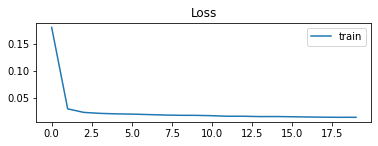

In [ ]:
%matplotlib inline
from matplotlib import pyplot
from numpy import where

# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.legend()

In [1]:
json_url = urlopen(https://drive.google.com/file/d/1v1NfS9neo8YBa57Tki7S3NUVLLMcEmep/view?usp=sharing)

      data = json.loads(json_url.read())

      print data

SyntaxError: ignored